MSE: 0.09625950504157361
R2 Score: 0.5721114166919792

Confusion Matrix:
 [[24  3]
 [ 5 47]]

Accuracy: 0.8987341772151899
Precision: 0.94
Recall: 0.9038461538461539
F1 Score: 0.9215686274509803


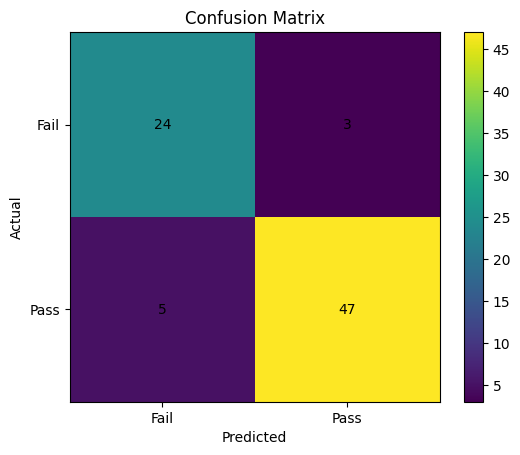

In [3]:
# ==============================
# Linear Regression (Binary Classification)
# Evaluation + Visualization
# ==============================

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# 2. Load dataset (upload student-mat.csv to Colab)
df = pd.read_csv("student-mat.csv")

# 3. Convert target to binary
# Pass = 1, Fail = 0
df["pass"] = (df["G3"] >= 10).astype(int)

# 4. Features & target
X = df.select_dtypes(include=["int64", "float64"]).drop(columns=["G3", "pass"])
y = df["pass"]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predictions
y_pred_cont = model.predict(X_test)
y_pred_bin = (y_pred_cont >= 0.5).astype(int)

# 8. Evaluation metrics
mse = mean_squared_error(y_test, y_pred_cont)
r2 = r2_score(y_test, y_pred_cont)

cm = confusion_matrix(y_test, y_pred_bin)
accuracy = accuracy_score(y_test, y_pred_bin)
precision = precision_score(y_test, y_pred_bin)
recall = recall_score(y_test, y_pred_bin)
f1 = f1_score(y_test, y_pred_bin)

# 9. Print results
print("MSE:", mse)
print("R2 Score:", r2)
print("\nConfusion Matrix:\n", cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 10. Visualize Confusion Matrix
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Fail", "Pass"])
plt.yticks([0, 1], ["Fail", "Pass"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar()
plt.show()


In [2]:
from google.colab import files
uploaded = files.upload()


Saving student-mat.csv to student-mat.csv
